<a href="https://colab.research.google.com/github/alpha597/ML_LAB_ASSIGNMENTS/blob/main/ML_Assign2_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/sample_data/optdigits.tra', header=None, sep=',')
df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [ ]:
df=df.sample(frac=1.0).reset_index(drop=True)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,0,12,16,10,0,0,0,0,...,0,1,4,4,9,16,11,0,0,2
1,0,0,11,15,8,0,0,0,0,5,...,0,0,0,11,16,12,0,0,0,0
2,0,0,6,13,16,14,0,0,0,0,...,0,0,0,6,14,0,0,0,0,7
3,0,0,4,11,16,12,5,0,0,0,...,0,0,0,7,12,15,6,0,0,3
4,0,0,7,16,14,2,0,0,0,0,...,0,0,0,8,16,16,16,16,4,2


In [ ]:
class_distribution = df.iloc[:, -1].value_counts()
print(class_distribution)

64
1    389
3    389
4    387
7    387
9    382
2    380
8    380
6    377
0    376
5    376
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = SVC(kernel='linear', C=1, gamma=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       0.98      0.98      0.98        91
           2       0.99      1.00      0.99        84
           3       0.95      0.98      0.97        58
           4       1.00      1.00      1.00        83
           5       1.00      0.99      0.99        77
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        78
           8       0.99      0.96      0.98        82
           9       0.96      0.96      0.96        73

    accuracy                           0.99       765
   macro avg       0.99      0.99      0.99       765
weighted avg       0.99      0.99      0.99       765

[[77  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  2]
 [ 0  0 84  0  0  0  0  0  0  0]
 [ 0  0  1 57  0  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0  0]
 [ 0  0  0  0  0 76  0  0  1  0]
 [ 0  0  0  0  0  0 62  0  0  0]
 [ 0  0  0

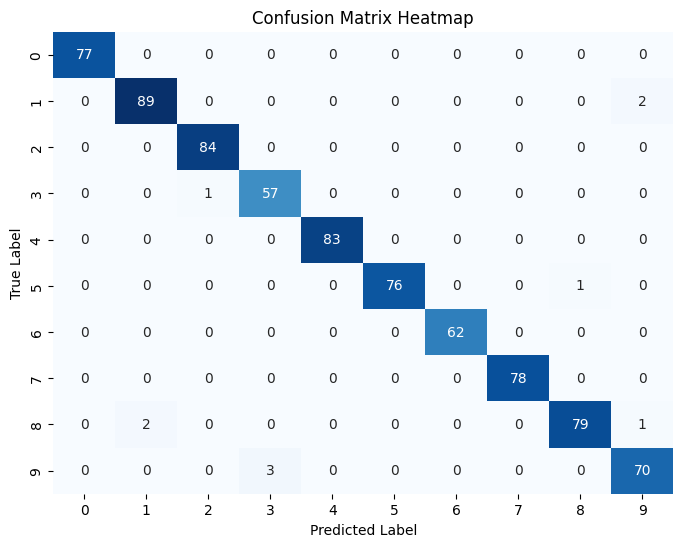

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       1.00      0.99      0.99        91
           2       0.99      0.99      0.99        84
           3       1.00      1.00      1.00        58
           4       0.98      1.00      0.99        83
           5       1.00      0.97      0.99        77
           6       1.00      1.00      1.00        62
           7       1.00      0.99      0.99        78
           8       0.99      1.00      0.99        82
           9       0.97      1.00      0.99        73

    accuracy                           0.99       765
   macro avg       0.99      0.99      0.99       765
weighted avg       0.99      0.99      0.99       765

[[76  0  1  0  0  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  0  1]
 [ 0  0 83  0  1  0  0  0  0  0]
 [ 0  0  0 58  0  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0  0]
 [ 0  0  0  0  1 75  0  0  1  0]
 [ 0  0  0  0  0  0 62  0  0  0]
 [ 0  0  0

/tmp/ipython-input-392443398.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


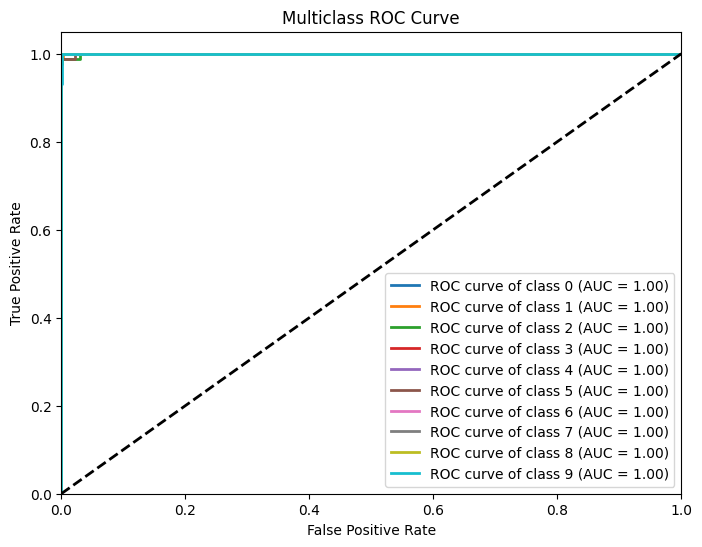

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

svc2 = SVC(kernel='rbf', C=10, gamma=0.01, probability=True) # Enable probability estimation
svc2.fit(X_train, y_train)
y_pred = svc2.predict(X_test)
y_prob = svc2.predict_proba(X_test) # Get predicted probabilities

print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))

# Calculate ROC curve and AUC for each class using One-vs-Rest strategy
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.108 total time=   1.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.109 total time=   1.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.108 total time=   0.8s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.108 total time=   0.8s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.108 total time=   0.8s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.765 total time=   0.7s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.742 total time=   0.7s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.742 total time=   0.7s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.691 total time=   0.7s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.733 total time=   0.7s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.949 total time=   0.3s
[CV 2/5] END .................C=0.1, gamma=0.01;

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.99      0.99      0.99        91
           2       0.99      1.00      0.99        84
           3       1.00      0.98      0.99        58
           4       0.99      0.99      0.99        83
           5       1.00      0.96      0.98        77
           6       1.00      1.00      1.00        62
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        82
           9       0.94      1.00      0.97        73

    accuracy                           0.99       765
   macro avg       0.99      0.99      0.99       765
weighted avg       0.99      0.99      0.99       765

[[76  0  1  0  0  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  0  1]
 [ 0  0 84  0  0  0  0  0  0  0]
 [ 0  0  0 57  0  0  0  0  0  1]
 [ 0  0  0  0 82  0  0  0  0  1]
 [ 0  0  0  0  1 74  0  1  0  1]
 [ 0  0  0  0  0  0 62  0  0  0]
 [ 0  0  0

/tmp/ipython-input-2015785391.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


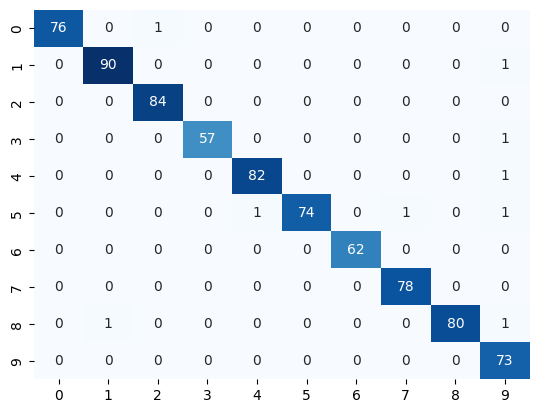

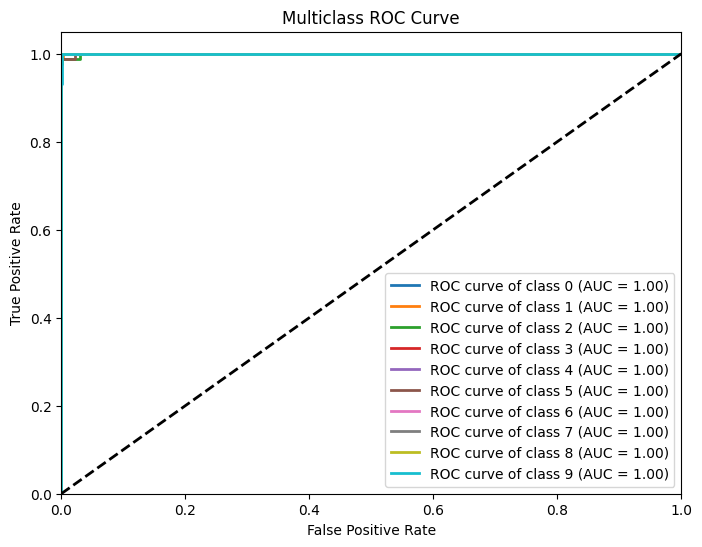

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       0.99      0.99      0.99        91
           2       1.00      1.00      1.00        84
           3       0.98      0.98      0.98        58
           4       0.98      1.00      0.99        83
           5       1.00      0.97      0.99        77
           6       1.00      1.00      1.00        62
           7       0.97      0.99      0.98        78
           8       0.99      0.98      0.98        82
           9       0.95      0.95      0.95        73

    accuracy                           0.99       765
   macro avg       0.99      0.99      0.99       765
weighted avg       0.99      0.99      0.99       765

[[77  0  0  0  0  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  0  1]
 [ 0  0 84  0  0  0  0  0  0  0]
 [ 0  0  0 57  0  0  0  0  0  1]
 [ 0  0  0  0 83  0  0  0  0  0]
 [ 0  0  0  0  0 75  0  0  1  1]
 [ 0  0  0  0  0  0 62  0  0  0]
 [ 0  0  0

/tmp/ipython-input-2058330847.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


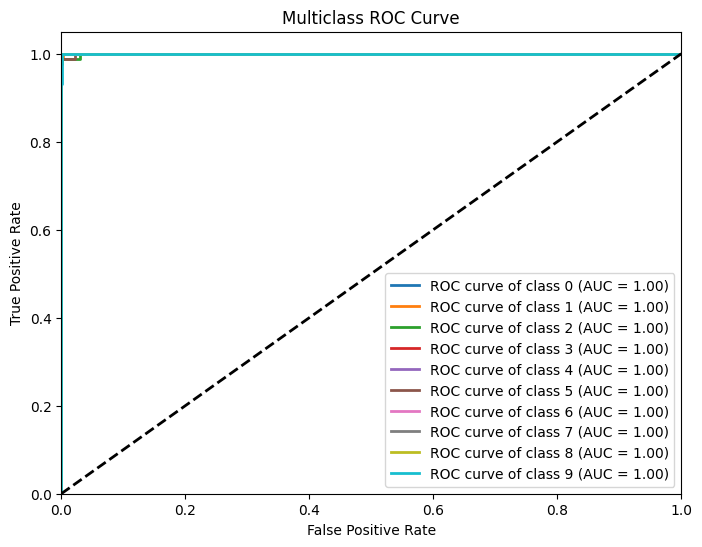

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.99      0.98      0.98        91
           2       1.00      0.99      0.99        84
           3       0.97      1.00      0.98        58
           4       0.97      1.00      0.98        83
           5       0.99      0.97      0.98        77
           6       1.00      0.98      0.99        62
           7       0.97      0.99      0.98        78
           8       0.99      0.95      0.97        82
           9       0.93      0.96      0.95        73

    accuracy                           0.98       765
   macro avg       0.98      0.98      0.98       765
weighted avg       0.98      0.98      0.98       765

[[76  0  0  0  0  1  0  0  0  0]
 [ 0 89  0  1  0  0  0  0  0  1]
 [ 0  0 83  0  0  0  0  0  1  0]
 [ 0  0  0 58  0  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0  0]
 [ 0  0  0  0  1 75  0  0  0  1]
 [ 0  0  0  0  1  0 61  0  0  0]
 [ 0  0  0

/tmp/ipython-input-1520118886.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


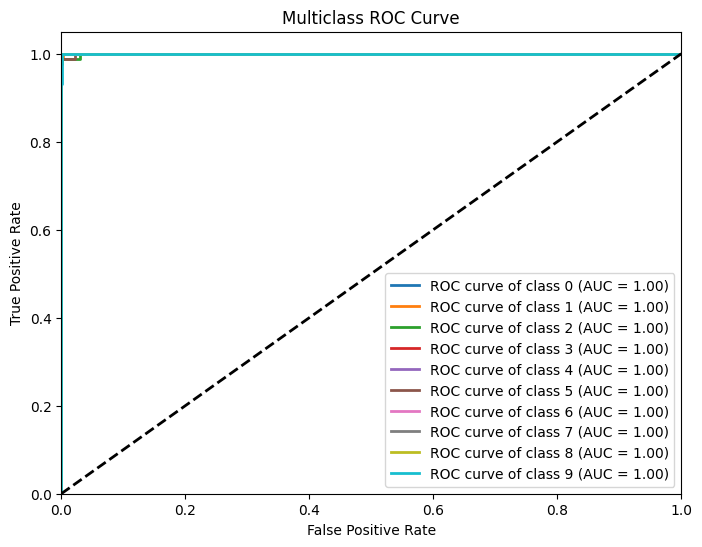

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()